In [1]:
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
header = ['num_apps', 'f1']
runs = ["exhaustive-792fa44c",
        "stems_cpp-d0444348",
        "stems_cpp-ae7659ad",
        "hifi-b0713cee",
        "stems-55bc1d39",
        "exhaustive-8dca03be",
        "exhaustive-f547966b",
        "stems_cpp-6b62e913",
        "stems_cpp-9681ab36",
        "stems_cpp-cf2781af",
#         "stems_cpp-08887354",
]
files = ["../../mainstream/test/tmp/{}/schedules/{}.mainstream.sim.debug.v0".format(f, f.split("-")[0]) for f in runs]
results = {}
results_lines = []
for run, filename in zip(runs, files):
    scheduler = run.split("-")[0]
    results[scheduler] = defaultdict(list)
    with open(filename) as f:
        for line in f:
            line = line.split(",")
            num_apps = int(line[0])
            time_taken = float(line[-1]) / 1e6
            results[scheduler][num_apps].append(time_taken)
            results_lines.append((scheduler, num_apps, time_taken))

In [3]:
df = pd.DataFrame(results_lines, columns=['Scheduler', 'No of Apps', 'Time Taken (s)'])
results

{'exhaustive': defaultdict(list,
             {2: [0.018666, 0.018012, 0.021479, 0.023237, 0.019701],
              4: [83.706473, 83.999809, 83.736907, 84.146175, 84.250945]}),
 'hifi': defaultdict(list,
             {2: [0.198133, 0.329124, 0.250915, 0.200162, 0.201019],
              4: [4.020686, 11.227126, 3.435195, 0.920063, 5.023017],
              6: [66.643201, 27.990678, 77.994669, 92.889264, 78.793313],
              8: [27.97608, 288.569969, 264.87621, 238.177351, 144.237129],
              10: [565.046015, 398.901864, 52.615956, 51.174528, 436.440657],
              12: [963.322336,
               1278.089201,
               685.778266,
               800.758427,
               1082.883482],
              14: [1998.848839, 1249.510122, 91.98368, 88.55635, 1518.235067],
              16: [2203.753348,
               2123.502931,
               2577.428618,
               2202.115347,
               2752.958031],
              18: [3420.485186,
               147.603328,
   

In [4]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df.groupby(['No of Apps', 'Scheduler']).mean()

Time Taken (s)
No of Apps Scheduler                 
2          exhaustive             0.0
           hifi                   0.2
           stems                  0.6
           stems_cpp              0.0
3          exhaustive             1.3
           stems_cpp              0.2
4          exhaustive            83.8
           hifi                   4.9
           stems                  8.8
           stems_cpp              0.4
5          stems_cpp              1.2
6          hifi                  68.9
           stems                 28.6
           stems_cpp              1.6
7          stems_cpp              2.4
8          hifi                 192.8
           stems                 46.5
           stems_cpp              2.7
9          stems_cpp              3.4
10         hifi                 300.8
           stems                 56.1
           stems_cpp              4.4
12         hifi                 962.2
           stems                109.4
           stems_cpp              7.7
13         stems_cpp              6.6
14         hifi                 989.4
           stems                123.6
           stems_cpp             13.2
15         stems_cpp             13.1
16         hifi                2372.0
           stems                209.1
           stems_cpp             10.5
17         stems_cpp             19.4
18         hifi                2124.3
           stems                178.5
           stems_cpp             16.6
19         stems_cpp             22.2
20         hifi                4676.7
           stems                319.1
           stems_cpp             18.8
21         stems_cpp             27.7
22         hifi                5253.0
           stems                356.1
           stems_cpp             30.3
23         stems_cpp             37.7
24         hifi                6820.3
           stems                454.2
           stems_cpp             31.4
25         stems_cpp             25.9
26         hifi                5569.9
           stems                328.3
           stems_cpp             37.8
27         stems_cpp              6.5
28         hifi                8073.2
           stems                395.0
           stems_cpp             53.6
29         stems_cpp             32.7
30         hifi                8414.4
           stems                503.6

In [5]:
pt = df.pivot_table(values='Time Taken (s)', index='No of Apps', columns='Scheduler')
pt

Scheduler,exhaustive,hifi,stems,stems_cpp
No of Apps,,,,
2,0.0,0.2,0.6,0.0
3,1.3,nan,nan,0.2
4,83.8,4.9,8.8,0.4
5,nan,nan,nan,1.2
6,nan,68.9,28.6,1.6
7,nan,nan,nan,2.4
8,nan,192.8,46.5,2.7
9,nan,nan,nan,3.4
10,nan,300.8,56.1,4.4


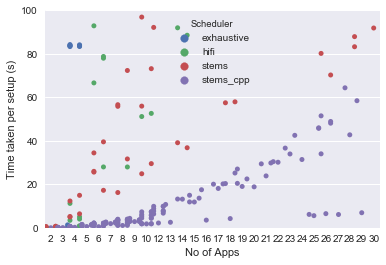

In [11]:
sns.swarmplot(x='No of Apps', y='Time Taken (s)', hue='Scheduler', data=df.sort_values(by=['Scheduler']))
plt.ylabel('Time taken per setup (s)')
plt.savefig("perf.pdf")
plt.savefig("perf.png", dpi=200)
plt.ylim(0, 100)
plt.savefig("perf_cropped.pdf")
plt.savefig("perf_cropped.png", dpi=200)

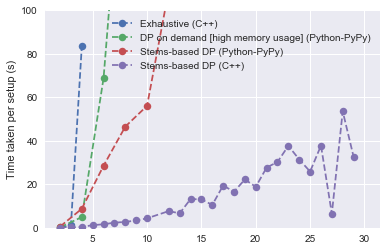

In [10]:
labels = {
    'exhaustive': "Exhaustive (C++)",
    'hifi': "DP on demand [high memory usage] (Python-PyPy)",
    "stems": "Stems-based DP (Python-PyPy)",
    "stems_cpp": "Stems-based DP (C++)",
}
for k, v in pt.iteritems():
    plt.plot(v.dropna(), '.--', label=labels[k], ms=15)
plt.legend()
plt.ylabel('Time taken per setup (s)')
plt.savefig("perf_nice.pdf")
plt.savefig("perf_nice.png", dpi=200)
plt.ylim(0, 100)
plt.savefig("perf_nice_cropped.pdf")
plt.savefig("perf_nice_cropped.png", dpi=200)
